# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
from torch.utils.data import DataLoader
from torchvision import datasets

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets
training_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)

# Create DataLoaders
train_loader = DataLoader(training_data, batch_size=256, shuffle=True)
test_loader = DataLoader(test_data, batch_size=256)


# Print the shape of the training and test data
print("Training Data:")
print(f"Images Shape: {training_data.data.shape}")
print(f"Labels Shape: {training_data.targets.shape}")

print("\nTest Data:")
print(f"Images Shape: {test_data.data.shape}")
print(f"Labels Shape: {test_data.targets.shape}")

Training Data:
Images Shape: torch.Size([60000, 28, 28])
Labels Shape: torch.Size([60000])

Test Data:
Images Shape: torch.Size([10000, 28, 28])
Labels Shape: torch.Size([10000])


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

Justification for Preprocessing Steps
Transforms Applied:

ToTensor():
Purpose: Converts images to PyTorch tensors.
Reason: PyTorch models need data in tensor format.

Normalize((0.5,), (0.5,)):
Purpose: Scales pixel values to the range [-1, 1].
Reason: Helps the model train faster and more reliably.

In summary, these steps prepare the data correctly for the neural network, leading to better performance.

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

2


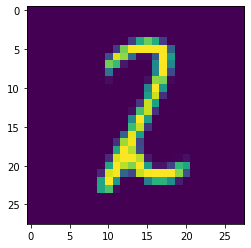

6


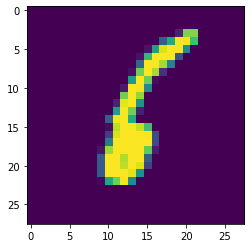

6


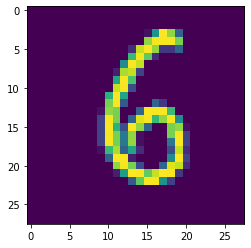

2


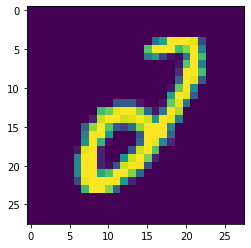

1


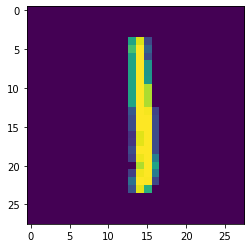

In [6]:
# Explore data
## YOUR CODE HERE ## for train
show5(train_loader)

7


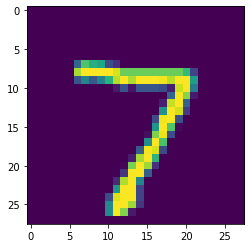

2


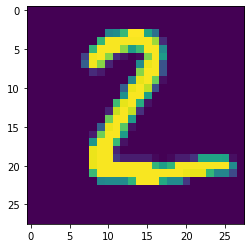

1


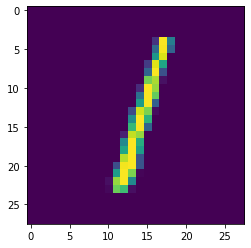

0


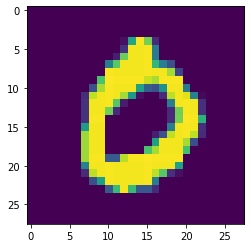

4


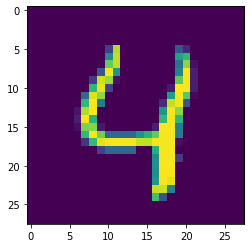

In [7]:
# Explore data
## YOUR CODE HERE ## for test
show5(test_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [8]:
## YOUR CODE HERE ##
# Define the neural network class
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28 * 1, 256)  # First fully connected layer
        self.fc2 = nn.Linear(256,128)           # Second fully connected layer
        self.fc3 = nn.Linear(128, 64)           # third fully connected layer
        self.fc4 = nn.Linear(64, 10)           # Output layer

    def forward(self, x):
        x = torch.flatten(x,1)            # Flatten the input image
        x = F.relu(self.fc1(x))          # Apply ReLU activation on the first layer
        x = F.relu(self.fc2(x))          # Apply ReLU activation on the second layer
        x = F.relu(self.fc3(x))          # Apply ReLU activation on the third layer
        x = self.fc4(x)                  # Output layer (logits)
        x = F.softmax(x, dim=1)
        return x

# Instantiate the model
model = Net()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [9]:
## YOUR CODE HERE ##
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer is commonly used for its adaptive learning rate
criterion = nn.CrossEntropyLoss()   # CrossEntropyLoss is commonly used for classification tasks

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [10]:
## YOUR CODE HERE ##
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

Plot the training loss (and validation loss/accuracy, if recorded).

Epoch 1 training accuracy: 0.74, training loss: 1.73724
Epoch 1 validation accuracy: 0.83, validation loss: 1.63029
Epoch 2 training accuracy: 0.84, training loss: 1.62243
Epoch 2 validation accuracy: 0.86, validation loss: 1.60712
Epoch 3 training accuracy: 0.90, training loss: 1.56839
Epoch 3 validation accuracy: 0.93, validation loss: 1.53317
Epoch 4 training accuracy: 0.93, training loss: 1.53110
Epoch 4 validation accuracy: 0.93, validation loss: 1.52834
Epoch 5 training accuracy: 0.94, training loss: 1.52036
Epoch 5 validation accuracy: 0.95, validation loss: 1.51461
Epoch 6 training accuracy: 0.95, training loss: 1.51343
Epoch 6 validation accuracy: 0.94, validation loss: 1.51799
Epoch 7 training accuracy: 0.95, training loss: 1.50759
Epoch 7 validation accuracy: 0.95, validation loss: 1.50960
Epoch 8 training accuracy: 0.96, training loss: 1.50281
Epoch 8 validation accuracy: 0.96, validation loss: 1.50112
Epoch 9 training accuracy: 0.96, training loss: 1.49815
Epoch 9 validati

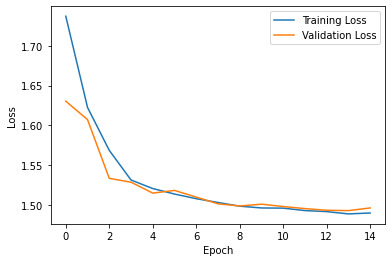

In [11]:
## YOUR CODE HERE ##
num_epochs = 15

# Establish a list for our history
train_loss_history = []
val_loss_history = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    total_samples = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()  # Sum the number of correct predictions
        total_samples += labels.size(0)  # Accumulate the total number of samples
        train_loss += loss.item()

    train_accuracy = train_correct / total_samples  # Calculate training accuracy
    print(f'Epoch {epoch + 1} training accuracy: {train_accuracy:.2f}, training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    # Validation
    val_loss = 0.0
    val_correct = 0
    total_samples = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs.data, 1)
            val_correct += (preds == labels).sum().item()
            total_samples += labels.size(0)
            val_loss += loss.item()

    val_accuracy = val_correct / total_samples
    print(f'Epoch {epoch + 1} validation accuracy: {val_accuracy:.2f}, validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))
    
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [12]:
## YOUR CODE HERE ##
correct_predictions = 0
total_predictions = 0

for inputs, labels in test_loader:
    if torch.cuda.is_available():
        inputs, labels = inputs.to(device), labels.to(device)
        
    outputs = model(inputs)
    _, preds = torch.max(outputs.data, 1)
    total_predictions += labels.size(0)
    correct_predictions += (preds == labels).sum().item()
    accuracy = (correct_predictions / total_predictions) * 100
    
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 96.45%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

Epoch 1 training accuracy: 0.98, training loss: 1.48316
Epoch 1 validation accuracy: 0.97, validation loss: 1.48852
Epoch 2 training accuracy: 0.98, training loss: 1.48243
Epoch 2 validation accuracy: 0.97, validation loss: 1.48893
Epoch 3 training accuracy: 0.98, training loss: 1.48059
Epoch 3 validation accuracy: 0.97, validation loss: 1.48873
Epoch 4 training accuracy: 0.98, training loss: 1.48044
Epoch 4 validation accuracy: 0.97, validation loss: 1.48913
Epoch 5 training accuracy: 0.98, training loss: 1.47983
Epoch 5 validation accuracy: 0.97, validation loss: 1.48827
Epoch 6 training accuracy: 0.98, training loss: 1.47783
Epoch 6 validation accuracy: 0.98, validation loss: 1.48593
Epoch 7 training accuracy: 0.98, training loss: 1.47817
Epoch 7 validation accuracy: 0.96, validation loss: 1.49703
Epoch 8 training accuracy: 0.98, training loss: 1.47763
Epoch 8 validation accuracy: 0.97, validation loss: 1.48698
Epoch 9 training accuracy: 0.99, training loss: 1.47576
Epoch 9 validati

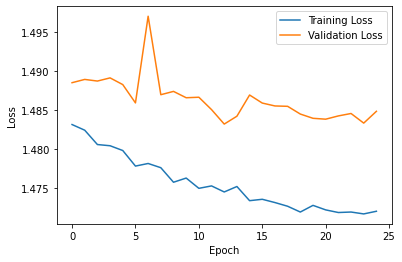

In [13]:
## YOUR CODE HERE ##
# Adjust hyperparameters
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Decreasing learning rate
num_epochs = 25 # Increase the number of epochs for more training

# Retrain the model with the new hyperparameters
# Establish a list for our history
train_loss_history = []
val_loss_history = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    total_samples = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()  # Sum the number of correct predictions
        total_samples += labels.size(0)  # Accumulate the total number of samples
        train_loss += loss.item()

    train_accuracy = train_correct / total_samples  # Calculate training accuracy
    print(f'Epoch {epoch + 1} training accuracy: {train_accuracy:.2f}, training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    # Validation
    val_loss = 0.0
    val_correct = 0
    total_samples = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs.data, 1)
            val_correct += (preds == labels).sum().item()
            total_samples += labels.size(0)
            val_loss += loss.item()

    val_accuracy = val_correct / total_samples
    print(f'Epoch {epoch + 1} validation accuracy: {val_accuracy:.2f}, validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))
    
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:
## YOUR CODE HERE ##
correct_predictions = 0
total_predictions = 0

for inputs, labels in test_loader:
    if torch.cuda.is_available():
        inputs, labels = inputs.to(device), labels.to(device)
        
    outputs = model(inputs)
    _, preds = torch.max(outputs.data, 1)
    total_predictions += labels.size(0)
    correct_predictions += (preds == labels).sum().item()
    accuracy = (correct_predictions / total_predictions) * 100
    
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 97.63%


## Saving your model
Using `torch.save`, save your model for future loading.

In [15]:
## YOUR CODE HERE ##
torch.save(model.state_dict(), "saved_model.pth")